# Mid Term Project - Group 1

We have two data sets train_transaction.csv and train_identity.csv . 

Using these training data sets our aim is to use machine learning algorithms and create a model and predict whether the transaction is fraudulant or not.

In one of the data sets (train_transaction) there is column (isFraud) which has two unique values i.e., 0 and 1 

'0' represents a legit transaction 
'1' represents a fradulant transaction 

## Objective and Performance Metric 

Objective: Maximize the area under ROC between predicted and given values.

Performance Metric = Area under ROC curve (AUC)

Before we jump into creating model, first we need to perform exploratory data analysis which includes cleaning, preprocessing of the data sets given to us so it can be an ideal data set to create a model on.

## Exploratory Data Analysis

In [1]:
# Import all the dependencies/ libraries we need 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [2]:
#reading identity and transaction file of training data sets

train_identity = pd.read_csv('train_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')

In [3]:
# let's see the head data of both data sets
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [4]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print('shape of identity: ', train_identity.shape)
print('shape of transaction: ', train_transaction.shape)

shape of identity:  (144233, 41)
shape of transaction:  (590540, 394)


The Identity data set has 41 features and 144233 data rows

The transaction data set has 394 features and 590540 data rows

In [6]:
# Merging both training data sets based on transaction ID given in the project description 
# we use merge function using attributes 'how' and 'on'
# 'how' attribute represents how we join the data sets in this case we used left as some of the transaction may not  
#  --contain transaction ID in identity column
# 'on' attribute represents the primary key column i.e., transactionID 

train = pd.merge(train_transaction,train_identity, on='TransactionID', how='left')

In [7]:
# the above cell in my laptop took 10 mins to run, so I am using memory reduction function 

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: 
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [8]:
#reducing the memory using the reduction function
train = reduce_mem_usage(train)
print('training data set shape: ', train.shape)

Mem. usage decreased to 650.48 Mb (66.8% reduction)
training data set shape:  (590540, 434)


- 67% memory is reduced using this function 

In [9]:
# Now lets dive into data analysis on the each column/ features given in training data set
# first on given target column i.e., isFraud

C:\Users\91733\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


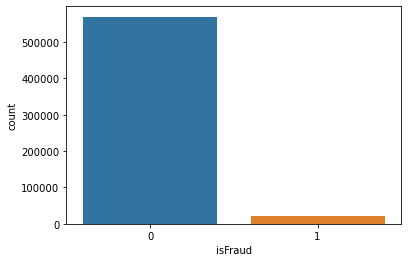

96.5 % is the legit data


In [10]:
sns.countplot(train['isFraud'])
plt.show()
print(np.round(train[train['isFraud']==0].shape[0]/train.shape[0]*100,2), '% is the legit data')

In [11]:
# As we can see this is highly imbalanced data

**Analysis on TransactionDT**

In [12]:
# describe() function best describes the column by calculating it's numerical attributes 
#like count, mean, std etc 

# we'll see how TransactionDT gets described
train['TransactionDT'].describe()

count    5.905400e+05
mean     7.372311e+06
std      4.617224e+06
min      8.640000e+04
25%      3.027058e+06
50%      7.306528e+06
75%      1.124662e+07
max      1.581113e+07
Name: TransactionDT, dtype: float64

In [13]:
# we are taking account of when fradulant transaction happened and describing them
train[train['isFraud']==1]['TransactionDT'].describe()

count    2.066300e+04
mean     7.690033e+06
std      4.416551e+06
min      8.976000e+04
25%      3.965858e+06
50%      7.575230e+06
75%      1.121743e+07
max      1.581088e+07
Name: TransactionDT, dtype: float64

In [14]:
train[train['isFraud']==0]['TransactionDT'].describe()

count    5.698770e+05
mean     7.360791e+06
std      4.623930e+06
min      8.640000e+04
25%      3.010651e+06
50%      7.271678e+06
75%      1.125334e+07
max      1.581113e+07
Name: TransactionDT, dtype: float64

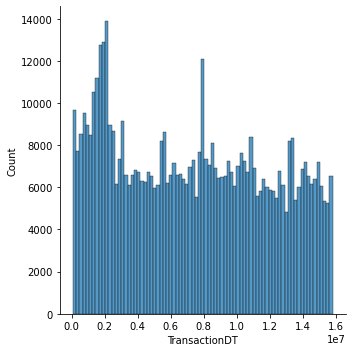

In [15]:
# distribution of TransactionDT column 
sns.displot(train['TransactionDT'], kde=False)

**Analysis on TransactionAmt**

In [16]:
# we know that 0 in isFraud is legit transaction, lets take those transaction into one data frame
legit_transaction = train_transaction.loc[train_transaction['isFraud']==0]
legit_transaction['TransactionAmt'].describe()

count    569877.000000
mean        134.511665
std         239.395078
min           0.251000
25%          43.970000
50%          68.500000
75%         120.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

In [17]:
# similarily for fraudulant transactions we'll create a seperate data frame
fraud_transaction = train_transaction.loc[train_transaction['isFraud']==1]
fraud_transaction['TransactionAmt'].describe()

count    20663.000000
mean       149.244779
std        232.212163
min          0.292000
25%         35.044000
50%         75.000000
75%        161.000000
max       5191.000000
Name: TransactionAmt, dtype: float64

In [18]:
print('the average Transaction amount for legit transaction is: ', np.mean(legit_transaction['TransactionAmt']))

the average Transaction amount for legit transaction is:  134.51166457896034


In [19]:
print('the average transaction amount for fraud transaction is: ', np.mean(fraud_transaction['TransactionAmt']))

the average transaction amount for fraud transaction is:  149.2447785897534


In [20]:
# we are calculating percentiles just to observe if these values are outliers or not 
# outliers are the values which vastly affect our data set
print('99.98 percentile values: ',np.percentile(train['TransactionAmt'],99.98))
print('99.99 percentile values: ',np.percentile(train['TransactionAmt'],99.99))

99.98 percentile values:  3777.160400000168
99.99 percentile values:  4224.0


- 99.98 percentile and 99.99 percentile has very large difference, lets check what are these values

In [21]:
train[train['TransactionAmt']>10000]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
274336,3261336,0,6652360,31936.0,W,16075,514.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274339,3261339,0,6652391,31936.0,W,16075,514.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Only 2 values which have higher than 10,000 and these 2 values seems like duplicate.
- Lets remove these 2 values.

In [22]:
train = train[train['TransactionAmt']<10000]

In [23]:
#Since some values are high in the dataset lets take log value of this amt and create a new feature.

In [24]:
train['LogTransactionAmt'] = np.log(train['TransactionAmt'])

C:\Users\91733\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91733\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


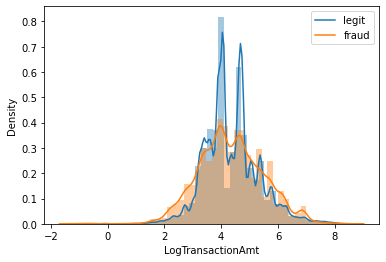

In [78]:
sns.distplot(train[train['isFraud']==0]['LogTransactionAmt'])
sns.distplot(train[train['isFraud']==1]['LogTransactionAmt'])
plt.legend(['legit','fraud'])

- from the figure we can observe that overlap values of fraud and legit is higher after 5 and before 3
- And logTransactionAmt from 3 to 5 have higher chance it is legit transaction.

<AxesSubplot:xlabel='TransactionDT', ylabel='TransactionAmt'>

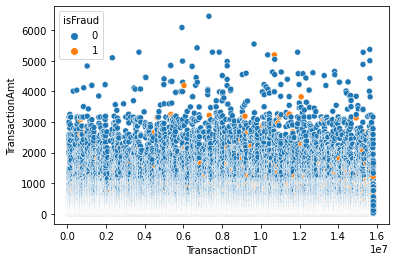

In [26]:
# lets see on what dates the fraudulant transaction took place 
sns.scatterplot(x="TransactionDT",y="TransactionAmt",hue="isFraud",data=train)

**Analysis on ProductCD column**

<AxesSubplot:xlabel='ProductCD', ylabel='percentage'>

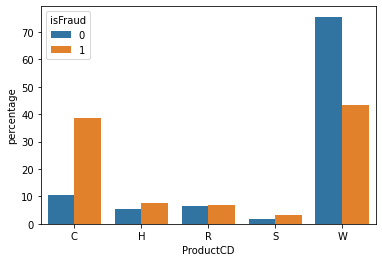

In [27]:
# we are trying to find on which products most fraudulant transactions happened 
# for this we use groupby attribute, value_counts tells us the number of unique values are there
# then we'll rename it so as to not get confused and finally we'll sort the values alphabetically

train_ProductCD = train.groupby(['isFraud'])['ProductCD'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('ProductCD')
sns.barplot(x="ProductCD", y="percentage", hue="isFraud", data=train_ProductCD)

- we can observe that if ProductCD is 'C' there is 40% chance that it is fraud
- similarily ProductCDs 'H', 'R', 'S' rate of doing fraud is also high

**Let's Analyse card1 column**

In [28]:
# describing card1 column
train['card1'].describe()

count    590538.000000
mean       9898.713741
std        4901.165273
min        1000.000000
25%        6019.000000
50%        9678.000000
75%       14182.750000
max       18396.000000
Name: card1, dtype: float64

C:\Users\91733\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91733\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


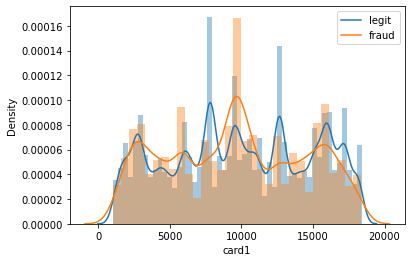

In [29]:
# lets plot fraud transactions done on card1

sns.distplot(train[train['isFraud']==0]['card1'])
sns.distplot(train[train['isFraud']==1]['card1'])
plt.legend(['legit','fraud'])

- looks like density of fraudulant transactions on card1 is 0.00016, which is good

**Similarily I'll do the analysis on card2 - card 5**

In [30]:
train_transaction['card2'].describe()

count    581607.000000
mean        362.555488
std         157.793246
min         100.000000
25%         214.000000
50%         361.000000
75%         512.000000
max         600.000000
Name: card2, dtype: float64

C:\Users\91733\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91733\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


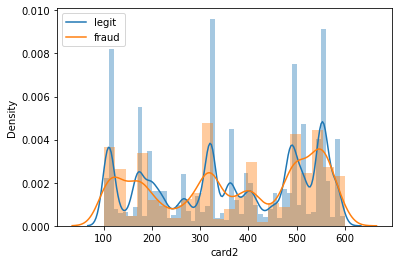

In [31]:
# plotting fraud transactions done on card2
sns.distplot(train[train['isFraud']==0]['card2'])
sns.distplot(train[train['isFraud']==1]['card2'])
plt.legend(['legit','fraud'])

In [32]:
#card 3 
train_transaction['card3'].describe()

count    588975.000000
mean        153.194925
std          11.336444
min         100.000000
25%         150.000000
50%         150.000000
75%         150.000000
max         231.000000
Name: card3, dtype: float64

C:\Users\91733\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91733\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


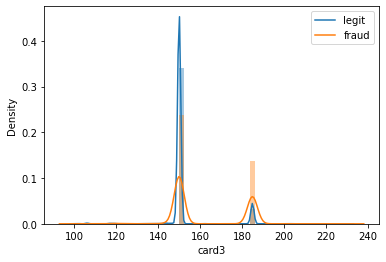

In [33]:
#plotting fraudulant transaction on card3

sns.distplot(train[train['isFraud']==0]['card3'])
sns.distplot(train[train['isFraud']==1]['card3'])
plt.legend(['legit','fraud'])

- It is interesting to note that majority of the fraudulant transactions are of 2 values only in card 3.

**Card 4**

<AxesSubplot:xlabel='card4', ylabel='percentage'>

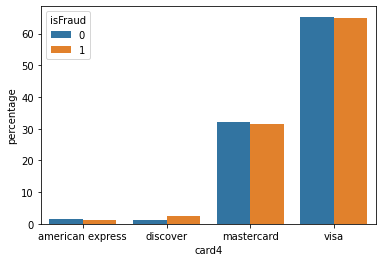

In [34]:
# card 4 contains the names of the payment network previous card(s) used in the transaction.
# so I will create a data frame just like I did for ProductCD by using groupby, value_counts attributes 
# mul here is multiplication as we are taking percentage of number of unique values are there to total number of transaction

train_card4 = (train[~train['card4'].isnull()].groupby(['isFraud'])['card4']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('card4'))
sns.barplot(x="card4", y="percentage", hue="isFraud", data=train_card4)

- WOW, just look at percentage of fraudulant transactions in visa and mastercard, 60% and 30% !!
- although the percentage of fraud transaction in visa and mastercard may be high but discover has more fraudulant transactions than their legit transactions, if you have discover payment network on your card change it xD 

**Card 5**

In [35]:
train_transaction['card5'].describe()

count    586281.000000
mean        199.278897
std          41.244453
min         100.000000
25%         166.000000
50%         226.000000
75%         226.000000
max         237.000000
Name: card5, dtype: float64

C:\Users\91733\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91733\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


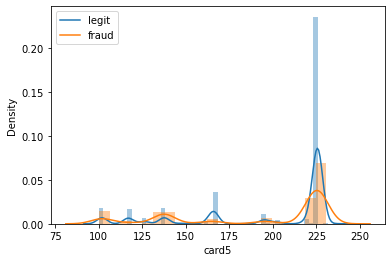

In [36]:
#plotting fraudulant transaction on card5

sns.distplot(train[train['isFraud']==0]['card5'])
sns.distplot(train[train['isFraud']==1]['card5'])
plt.legend(['legit','fraud'])

- at some intervals there is high chance for fraud for example at 225. 
- similarily legit transaction happen most at 160

**Card 6**

<AxesSubplot:xlabel='card6', ylabel='percentage'>

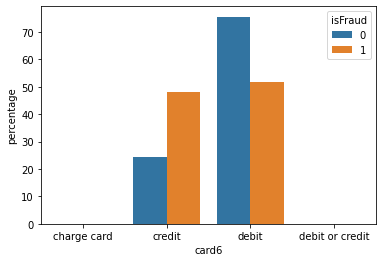

In [37]:
# card 6 tells us whether the card used in transaction is for credit or debit 
# since we have unique values we use the same process we did on card 4 

train_card6 = (train[~train['card6'].isnull()].groupby(['isFraud'])['card6']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('card6'))
sns.barplot(x="card6", y="percentage", hue="isFraud", data=train_card6)

- credit card holders have high chance of having fraud transaction than debit card holders
- charge card and debit or credit cards have 0% affect on data set so lets replace them into one.

In [38]:
def replaceToOther(value):
    if value==np.nan:
        return value
    if value=='debit or credit' or value=='charge card':
        return 'debit'
    else:
        return value
train['card6'] = train['card6'].apply(replaceToOther)

**Analysis of address columns**

- address 1 is the purchaser zip code
- address 2 is the billing country

In [39]:
train_transaction['addr1'].describe()

count    524834.000000
mean        290.733794
std         101.741072
min         100.000000
25%         204.000000
50%         299.000000
75%         330.000000
max         540.000000
Name: addr1, dtype: float64

C:\Users\91733\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91733\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


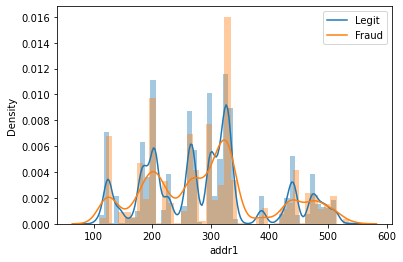

In [40]:
# plotting fraudulant transactions based on address column in data set
sns.distplot(train[(train['isFraud']==0) & (~train['addr1'].isnull())]['addr1'])
sns.distplot(train[(train['isFraud']==1) & (~train['addr1'].isnull())]['addr1'])
plt.legend(['Legit','Fraud'])

In [41]:
# Similarily for address 2 
train_transaction['addr2'].describe()

count    524834.000000
mean         86.800630
std           2.690623
min          10.000000
25%          87.000000
50%          87.000000
75%          87.000000
max         102.000000
Name: addr2, dtype: float64

C:\Users\91733\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91733\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


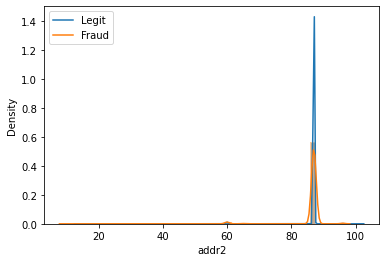

In [42]:
# plotting fraudulant transactions based on address column in data set
sns.distplot(train[(train['isFraud']==0) & (~train['addr2'].isnull())]['addr2'])
sns.distplot(train[(train['isFraud']==1) & (~train['addr2'].isnull())]['addr2'])
plt.legend(['Legit','Fraud'])

- Most of the data is from 80-100 which means that most of the data is from a particular country. 
- Now lets check whether this is true or not

In [43]:
train['addr2'].value_counts()

87.0    520479
60.0      3084
96.0       638
32.0        91
65.0        82
         ...  
50.0         1
15.0         1
25.0         1
82.0         1
22.0         1
Name: addr2, Length: 74, dtype: int64

In [44]:
print('country with code 87 has ',np.round(520479/train.shape[0]*100,2), '% of total data')

country with code 87 has  88.14 % of total data


- As you can see more than half a million values are from a country with code 87, which is interesting.

**Analysis for P_emaildomain and R_emaildomain**

In [45]:
train['P_emaildomain'].value_counts()[:10]

gmail.com        228355
yahoo.com        100932
hotmail.com       45250
anonymous.com     36998
aol.com           28289
comcast.net        7888
icloud.com         6267
outlook.com        5096
msn.com            4092
att.net            4033
Name: P_emaildomain, dtype: int64

- As we can see we have mails from different domains, we can find out which domain has suffered from most fraudulant transactions


In [46]:
# return domain function here splits P_emaildomain column into two arrays, one before dot and one after dot
# before .(dot) we have the domain of the email. After domain we have the extension of the email
# We use domain to plot fraud transactions

def returndomain(email):
    return email.split(".")[0]
train['edomain'] = train[~train['P_emaildomain'].isnull()]['P_emaildomain'].apply(returndomain)

In [47]:
# train_email has the new features values sorted and has percentage of total data
train_email = (train.groupby(['isFraud'])['edomain']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('edomain'))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'aim'),
  Text(1, 0, 'anonymous'),
  Text(2, 0, 'aol'),
  Text(3, 0, 'att'),
  Text(4, 0, 'bellsouth'),
  Text(5, 0, 'cableone'),
  Text(6, 0, 'centurylink'),
  Text(7, 0, 'cfl'),
  Text(8, 0, 'charter'),
  Text(9, 0, 'comcast'),
  Text(10, 0, 'cox'),
  Text(11, 0, 'earthlink'),
  Text(12, 0, 'embarqmail'),
  Text(13, 0, 'frontier'),
  Text(14, 0, 'frontiernet'),
  Text(15, 0, 'gmail'),
  Text(16, 0, 'gmx'),
  Text(17, 0, 'hotmail'),
  Text(18, 0, 'icloud'),
  Text(19, 0, 'juno'),
  Text(20, 0, 'live'),
  Text(21, 0, 'mac'),
  Text(22, 0, 'mail'),
  Text(23, 0, 'me'),
  Text(24, 0, 'msn'),
  Text(25, 0, 'netzero'),
  Text(26, 0, 'optonline'),
  Text(27, 0, 'outlook'),
  Text(28, 0, 'prodigy'),
  Text(29, 0, 'protonmail'),
  Text(30, 0, 'ptd'),
  Text(31, 0, 'q'),
  Text(32, 

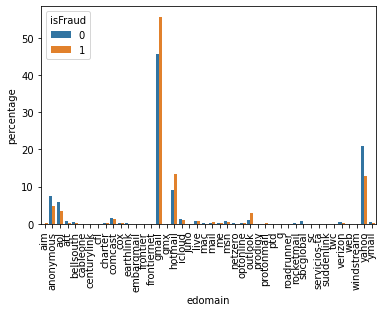

In [48]:
# xticks function : Get or set the current tick locations and labels of the x-axis
sns.barplot(x="edomain", y="percentage", hue="isFraud", data=train_email)
plt.xticks(rotation = 90)

- from the function returndomain, we have two features domain name and its extension 
- also from the figure most of the data has email from gmail domain which is fair to say also has more fraud transactions. 
- hotmail is the only domain which has more fraud transactions than legit transactions. 

**Analysis for C1 - C14 columns**

We could use the same describe function and then plot it's distribution with respect to isFraud column for every feature from C1 to C14 but instead I am creating a correlation matrix which probably best to find relation between them.

In [49]:
correlation_between_c = train[['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','isFraud']]

In [50]:
# corr() functions calculates the correlations between columns in the data frame
# I am using a data frame which has 'C' features and 'isFraud' column

cr = correlation_between_c.corr()

<AxesSubplot:>

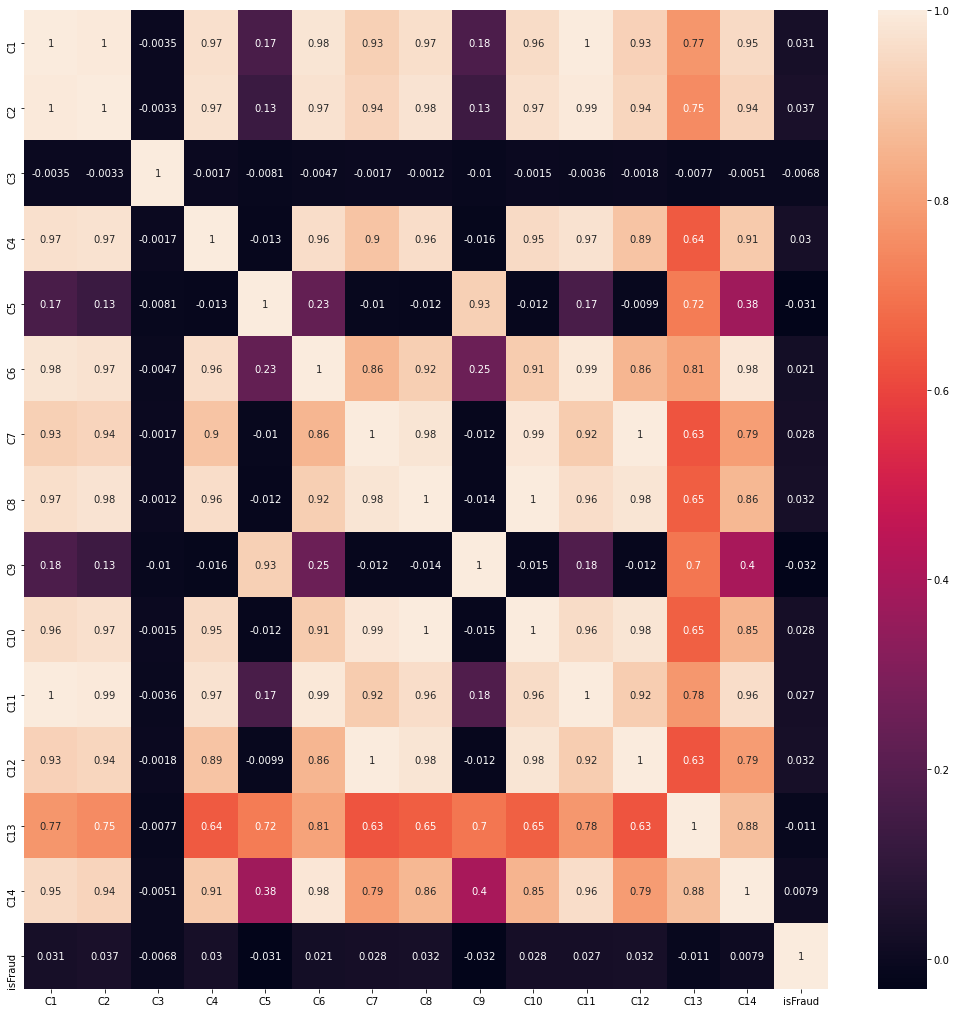

In [51]:
# figsize is used to give size of the figure and from seaborn library we are using heatmap to visualize relationship
# annot : If True, write the data value in each cell. Generally used if data is array like instead of data

plt.figure(1,figsize=(18,18))
sns.heatmap(cr,annot=True)

- from the heatmap, every 'C' feature has no correlation to isFraud column
- also some features are highly correlated like C1 and C4, C1 and C6, C6 and C11
- Don't know what this means until we go to modelling by removing these features and checking accuracy score

**Analysis for D features i.e., D1 to D15**

- Just like for C features we will be using correlation matrix for D features

In [52]:
#lets find the corelation between these D features with 'isFraud' features
cor_d = train[['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15','isFraud']]

In [53]:
f = cor_d.corr()

<AxesSubplot:>

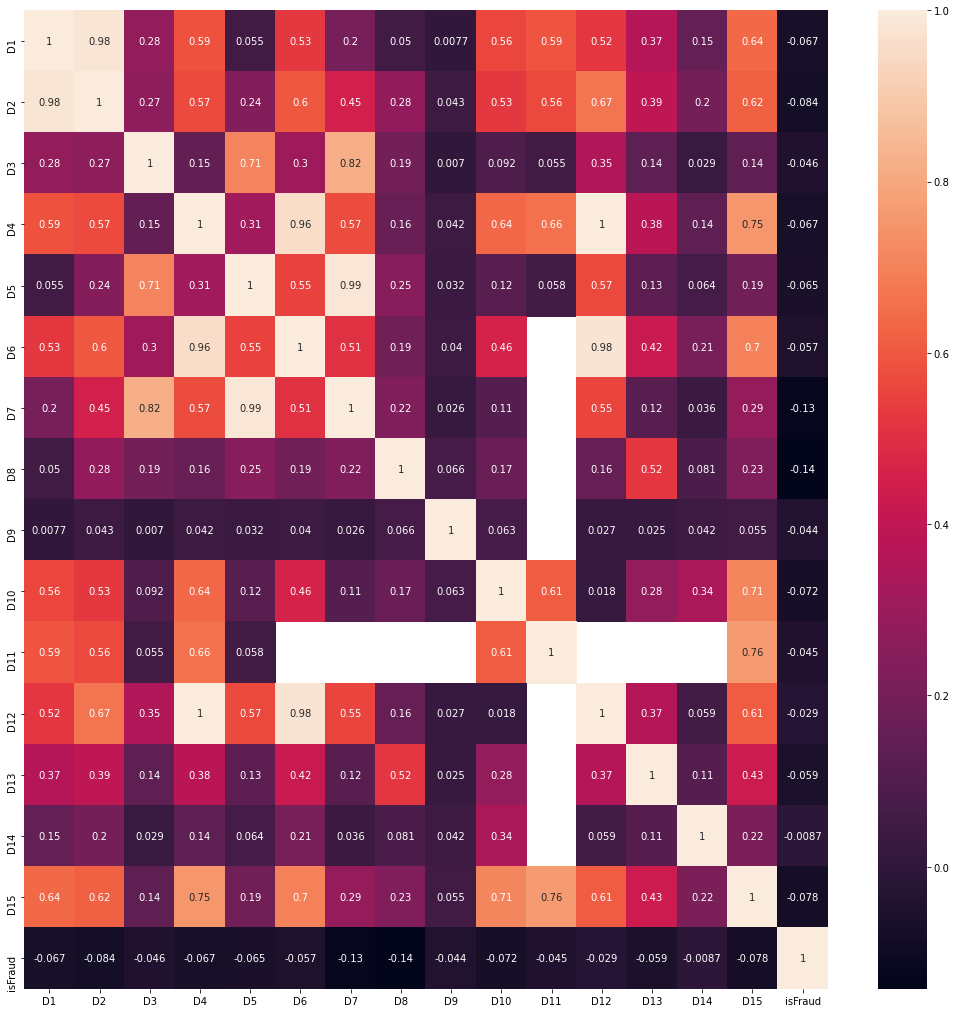

In [54]:
plt.figure(1,figsize=(18,18))
sns.heatmap(f,annot=True)

- Highly correlated features are  'D4 and D12' and 'D6 and D12' and 'D5 and D7'

**Data Analysis for M features**

In [57]:
# Finding out what type of values and how many unique values are there in each 'M' feature using value_counts()

for i in ['M1','M2','M3','M4','M5','M6','M7','M8','M9']:
    print(train[(~train[i].isnull())&(train['isFraud']==0)][i].value_counts())
    print(train[(~train[i].isnull())&(train['isFraud']==1)][i].value_counts())
    print('\n\n')

T    313071
F        25
Name: M1, dtype: int64
T    6342
Name: M1, dtype: int64



T    280308
F     32788
Name: M2, dtype: int64
T    5158
F    1184
Name: M2, dtype: int64



T    247436
F     65660
Name: M3, dtype: int64
T    4293
F    2049
Name: M3, dtype: int64



M0    189207
M2     53056
M1     51397
Name: M4, dtype: int64
M0    7198
M2    6809
M1    1429
Name: M4, dtype: int64



F    128977
T    103512
Name: M5, dtype: int64
T    4055
F    3514
Name: M5, dtype: int64



F    222459
T    190029
Name: M6, dtype: int64
F    5397
T    3295
Name: M6, dtype: int64



F    207283
T     32173
Name: M7, dtype: int64
F    4089
T     728
Name: M7, dtype: int64



F    151876
T     87593
Name: M8, dtype: int64
F    3373
T    1444
Name: M8, dtype: int64



T    201996
F     37473
Name: M9, dtype: int64
T    3658
F    1159
Name: M9, dtype: int64






- Most of the M features are binary distributed i.e., 0 and 1 
- Except M4 feature which has 3 unique values, M0, M1, M2

**Data Analysis on V features**

- In the transaction data set we have 339 V features. We cannot visualize them one by one.
- First we'll seperate V features and then see what can we find out.

In [58]:
# seperating vfeatures from rest of the features. 
v_features = []
for i in train.columns:
    if 'V' in i:
        v_features.append(i)

In [69]:
# creating a data frame of v features.
v_features_df = train_transaction[v_features]

In [70]:
v_features_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# number of NaN values in each V features.
v_features_df.isna().sum()

V1      279287
V2      279287
V3      279287
V4      279287
V5      279287
         ...  
V335    508189
V336    508189
V337    508189
V338    508189
V339    508189
Length: 339, dtype: int64

In [72]:
# info() gives us number of rows, columns, data type and memory usage of the data frame. 

v_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 339 entries, V1 to V339
dtypes: float64(339)
memory usage: 1.5 GB


In [73]:
# deleting it to save memory usage.
del v_features_df

- All the V features are float type
- Almost every V feature has higher NaN values
- We have to do fill or remove NaN values before applying model.

**Data Analysis on DeviceInfo and DeviceType**

In [75]:
# number of unique values present in Device Info
train['DeviceInfo'].value_counts()

Windows            47722
iOS Device         19782
MacOS              12573
Trident/7.0         7440
rv:11.0             1901
                   ...  
SCH-I435               1
Z812                   1
LG-H810/H81021z        1
Fusion5_u7             1
WAS-LX2J               1
Name: DeviceInfo, Length: 1786, dtype: int64

- There are 1786 devices used in the transaction which is a lot. 

<AxesSubplot:xlabel='DeviceType', ylabel='percentage'>

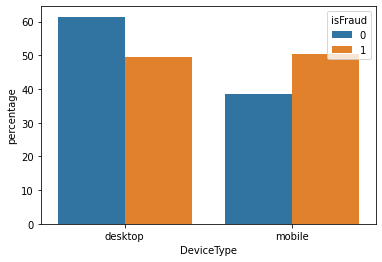

In [76]:
# DeviceType

DeviceType = (train.groupby(['isFraud'])['DeviceType']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('DeviceType'))
sns.barplot(x="DeviceType", y="percentage", hue="isFraud", data=DeviceType)

- From the plot, mobile transactions are mostly fraudulant.
- Both desktop and mobile same percentage of fraudulant transactions. 

# Feature Engineering and Selection

- In this part, we'll decide which features should we use and what other transformations or functions should we use so as to make our data set ready to use on ML model

In [79]:
# Let's start with identity data set
# finding out what are categorical features
# Categorical features are features of data type 'object'

categorical = [feature for feature in train_identity.columns if train_identity[feature].dtype=='O']
categorical

['id_12',
 'id_15',
 'id_16',
 'id_23',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo']

In [82]:
# now that we've found out what are categorical features, let's calculate %NaN values present in them.

for feature in categorical:
    print("{}: {}% missing values".format(feature,np.round(train_identity[feature].isnull().mul(100).mean(),4)))

id_12: 0.0% missing values
id_15: 2.2519% missing values
id_16: 10.3257% missing values
id_23: 96.4162% missing values
id_27: 96.4162% missing values
id_28: 2.2568% missing values
id_29: 2.2568% missing values
id_30: 46.2224% missing values
id_31: 2.7393% missing values
id_33: 49.1871% missing values
id_34: 46.056% missing values
id_35: 2.2519% missing values
id_36: 2.2519% missing values
id_37: 2.2519% missing values
id_38: 2.2519% missing values
DeviceType: 2.3732% missing values
DeviceInfo: 17.7262% missing values


- Since categorical values are important in ML model, we'll remove those features whose %NaN values are high.
- In this case id_23 and id_27 which have 96% of NaN values in them.

In [83]:
train_identity.drop(['id_23', 'id_27'], axis=1)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


- Generally we deal with NaN values based on the dtype
- If dtype is object then we impute NaN values with mode of the data
- If dtype is numerical then we impute NaN values with mean of the data
- Or Replace them with specific values
- Or we can always drop them, but that doesn't work efficiently with model. 



- At this point we are dealing NaN values by replacing them '-999' 
- If roc_auc_score is less using this, then we'll try another method to deal with NaN's. 

In [84]:
# replace NaN values
train_identity=train_identity.fillna(value=-999)

In [85]:
# Replace with numerical values
train_identity = train_identity.replace("Found", 1)
train_identity = train_identity.replace("NotFound", 2)
train_identity = train_identity.replace("New", 3)
train_identity = train_identity.replace("mobile", 4)
train_identity = train_identity.replace("desktop", 5)
train_identity = train_identity.replace("T", 6)
train_identity = train_identity.replace("F", 7)

In [86]:
train_identity.select_dtypes("object")

,id_15,id_23,id_30,id_31,id_33,id_34,DeviceInfo
0,3,-999,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,SAMSUNG SM-G892A Build/NRD90M
1,3,-999,iOS 11.1.2,mobile safari 11.0,1334x750,match_status:1,iOS Device
2,1,-999,-999,chrome 62.0,-999,-999,Windows
3,3,-999,-999,chrome 62.0,-999,-999,-999
4,1,-999,Mac OS X 10_11_6,chrome 62.0,1280x800,match_status:2,MacOS
...,...,...,...,...,...,...,...
144228,1,-999,-999,chrome 66.0 for android,-999,-999,F3111 Build/33.3.A.1.97
144229,3,-999,Android 7.1.1,chrome 55.0 for android,855x480,match_status:2,A574BL Build/NMF26F
144230,3,-999,-999,chrome 65.0 for android,-999,-999,Moto E (4) Plus Build/NMA26.42-152
144231,1,-999,Mac OS X 10_9_5,chrome 66.0,2560x1600,match_status:2,MacOS


In [87]:
train_identity["id_15"]=train_identity["id_15"].astype(str)
train_identity["id_23"]=train_identity["id_23"].astype(str)
train_identity["id_30"]=train_identity["id_30"].astype(str)
train_identity["id_31"]=train_identity["id_31"].astype(str)
train_identity["id_33"]=train_identity["id_33"].astype(str)
train_identity["id_34"]=train_identity["id_34"].astype(str)
train_identity["DeviceInfo"]=train_identity["DeviceInfo"].astype(str)

In [88]:
train_identity.select_dtypes("object")

,id_15,id_23,id_30,id_31,id_33,id_34,DeviceInfo
0,3,-999,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,SAMSUNG SM-G892A Build/NRD90M
1,3,-999,iOS 11.1.2,mobile safari 11.0,1334x750,match_status:1,iOS Device
2,1,-999,-999,chrome 62.0,-999,-999,Windows
3,3,-999,-999,chrome 62.0,-999,-999,-999
4,1,-999,Mac OS X 10_11_6,chrome 62.0,1280x800,match_status:2,MacOS
...,...,...,...,...,...,...,...
144228,1,-999,-999,chrome 66.0 for android,-999,-999,F3111 Build/33.3.A.1.97
144229,3,-999,Android 7.1.1,chrome 55.0 for android,855x480,match_status:2,A574BL Build/NMF26F
144230,3,-999,-999,chrome 65.0 for android,-999,-999,Moto E (4) Plus Build/NMA26.42-152
144231,1,-999,Mac OS X 10_9_5,chrome 66.0,2560x1600,match_status:2,MacOS


In [90]:
# Label Encoder

train_identity["DeviceInfo"] = LabelEncoder().fit_transform(train_identity["DeviceInfo"])
train_identity["id_30"] = LabelEncoder().fit_transform(train_identity["id_30"])
train_identity["id_31"] = LabelEncoder().fit_transform(train_identity["id_31"])
train_identity["id_33"] = LabelEncoder().fit_transform(train_identity["id_33"])
train_identity["id_34"] = LabelEncoder().fit_transform(train_identity["id_34"])
train_identity["id_15"] = LabelEncoder().fit_transform(train_identity["id_15"])
train_identity["id_23"] = LabelEncoder().fit_transform(train_identity["id_23"])

In [91]:
train_identity=train_identity.iloc[:100000]
train_identity.shape

(100000, 41)

In [92]:
train_transaction = train_transaction.fillna(value=-999)

In [93]:
# Find categorical features
categorical = [feature for feature in train_transaction.columns if train_transaction[feature].dtype=='O']
categorical

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [94]:
# Typecasting

for feature in categorical:
    train_transaction[feature]=train_transaction[feature].astype(str)

In [95]:
#Label Encoder

for feature in categorical:
    train_transaction[feature]=LabelEncoder().fit_transform(train_transaction[feature])

In [96]:
train_transaction=train_transaction.iloc[:100000]
train_transaction.shape

(100000, 394)

In [97]:
del train

In [98]:
# Merge both dataframes
df = pd.merge(train_identity, train_transaction, on = "TransactionID", how = "outer")
df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004,0.0,70787.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008,-5.0,98945.0,-999.0,-999.0,0.0,-5.0,-999.0,-999.0,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,-999.0,-999.0,0.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,2987011,-5.0,221832.0,-999.0,-999.0,0.0,-6.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,-999.0,-999.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
df.isna().sum()

TransactionID        0
id_01            58554
id_02            58554
id_03            58554
id_04            58554
                 ...  
V335             58554
V336             58554
V337             58554
V338             58554
V339             58554
Length: 434, dtype: int64

In [100]:
df=df.dropna()

In [101]:
df.isna().sum()

TransactionID    0
id_01            0
id_02            0
id_03            0
id_04            0
                ..
V335             0
V336             0
V337             0
V338             0
V339             0
Length: 434, dtype: int64

In [102]:
df.shape

(41446, 434)

# Modelling

In [103]:
# X, Y and split data

from sklearn.model_selection import train_test_split
X=df.drop(['isFraud'], axis=1).values
y=df['isFraud'].values

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [104]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(33156, 433) (33156,) (8290, 433) (8290,)


In [110]:
# Random Forest classifier

model = RandomForestClassifier(criterion = "entropy")
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [111]:
y_pred = model.predict_proba(X_test)

In [112]:
print('AUC score: ',roc_auc_score(y_test,y_pred[:,1]))

AUC score:  0.9423152024493877
